In [1]:
import numpy as np
import pandas as pd
import gower
from pipelines import model

In [2]:
df_interactions = pd.read_csv('/Users/yassinkortam/Documents/GitHub/segmentation-pipeline/data/interactions/training_sample.csv')
df_cc = pd.read_csv('/Users/yassinkortam/Documents/GitHub/segmentation-pipeline/data/cc/cc.csv').dropna()

# Customer Segmentation by Credit Card Information

## Dataset 

The dataset comprises of n=8951 customers and contains information that characterizes their spending habits. By clustering this data, customers can be segmented accordingly and ads can be customized appropriately. In a real application, this dataset must be very large to encompass as many potential app users as possible.

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [3]:
df_cc.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


## Clustering

In [4]:
cc_distance_matrix = gower.gower_matrix(df_cc.drop('CUST_ID', axis=1))
cc_labels = model.get_labels(cc_distance_matrix)
df_cc['cluster'] = cc_labels

Best score: 0.3329121172428131, n_clusters: 4
Score: 0.3329121172428131, n_clusters: 4


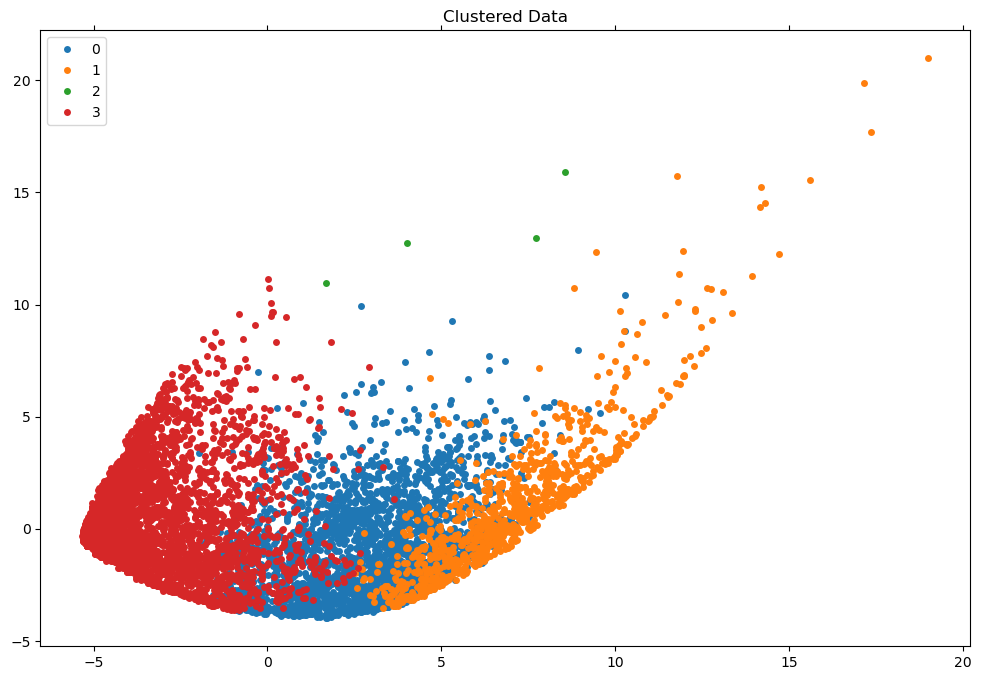

In [5]:
model.plot_clusters(distance_matrix=cc_distance_matrix, labels=cc_labels)

In [6]:
df_cc.drop('CUST_ID', axis=1).groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1114.498035,0.916621,1116.306574,492.290186,624.664010,551.706367,0.847526,0.212649,0.669798,0.076659,1.878526,19.011218,4238.083414,1436.138629,844.442521,0.269819,11.439103
1,2238.322769,0.991398,4185.724369,2666.109923,1519.614446,618.836349,0.984717,0.724703,0.867044,0.088047,2.384193,60.458836,7375.466520,4151.963823,905.359476,0.265732,11.974753
2,5381.525088,0.772727,16815.832500,16673.650000,142.182500,16662.671647,0.416666,0.312500,0.145833,0.416667,39.500000,24.250000,18775.000000,39815.265435,6290.642656,0.250000,12.000000
3,1801.848764,0.861424,324.345186,259.174679,65.315268,1354.915312,0.160929,0.098524,0.066269,0.188502,4.439904,3.333406,4137.319687,1518.865516,864.927574,0.063210,11.511411


## Clusters
- 0 : Less than medium balance, purchases, and borrowing (lower middle class)
- 1 : Medium balance, purchases, and borrowing (middle class)
- 2 : Ignore, outlier (upper class)
- 3 : Low balance, purchases, high borrowing (lower class)

# Customer Segmentation by App Activity

## Dataset

The dataset comprises of n=455401 customers and contains categorical data about their interactions in an online store. Apps that contain advertisements can be loosely considered to be online stores, where instead of adding products to their carts they click on ads and instead of checking out they interact with the advertiser's site. With this interpretation of the data, segmenting it can help characterize customer propensity to engage with advertisements on an individualized basis. 

In [7]:
df_interactions.head(3)

(455401, 25)


,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


## Clustering

In [8]:
df_interactions = df_interactions.sample(n=10000, replace=False, random_state=42).dropna()
interactions_distance_matrix = gower.gower_matrix(df_interactions.drop('UserID', axis=1).sample(n=10000, replace=False, random_state=42).dropna().astype(float), cat_features=np.arange(0, df_interactions.shape[1]-1))
interactions_labels = model.get_labels(interactions_distance_matrix)
df_interactions['cluster'] = interactions_labels

Best score: 0.5979841351509094, n_clusters: 2
Score: 0.5979841351509094, n_clusters: 2


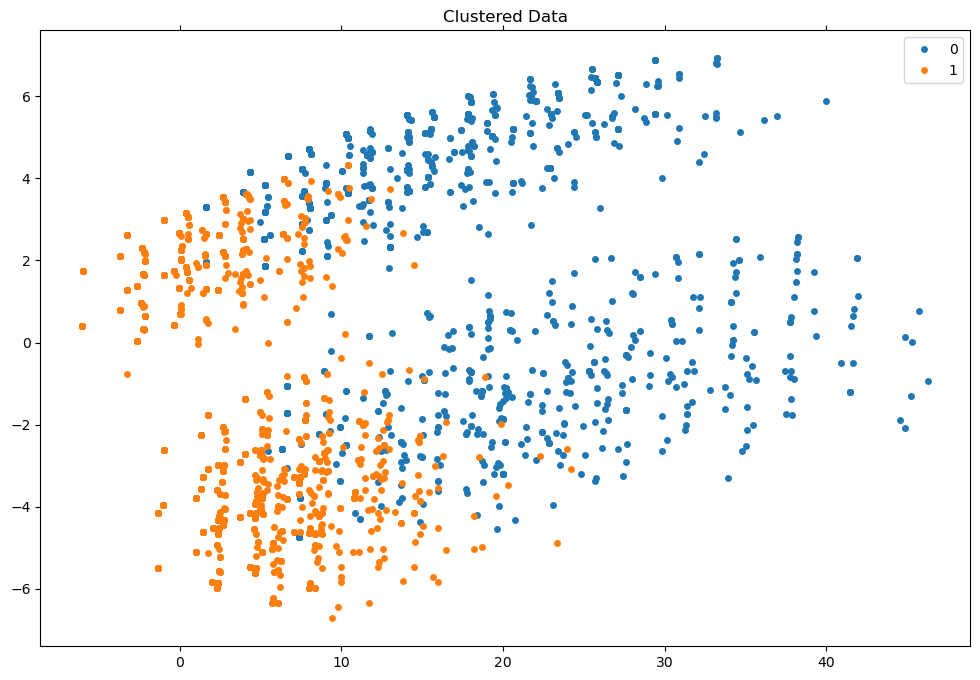

In [9]:
model.plot_clusters(distance_matrix=interactions_distance_matrix, labels=interactions_labels)

In [18]:
df_interactions.drop('UserID', axis=1).groupby('cluster').mean()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.088407,0.064220,0.105922,0.040033,0.027523,0.00417,0.013344,0.001668,0.246872,0.015847,...,0.000834,0.005838,0.000000,0.299416,0.682235,0.193495,0.129274,0.543786,0.940784,0.034195
1,0.099193,0.073174,0.112033,0.042041,0.030906,0.00375,0.017839,0.004431,0.231337,0.016930,...,0.000795,0.005908,0.001023,0.290308,0.678446,0.202931,0.122600,0.531303,0.933530,0.039427


## Clusters

- 0 : Customers who didn't add products to their detail wishlist or click on promo banner
- 0 : Customers who did add products to their detail wishlist and click on promo banner